In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_Train=pd.read_csv('train_ctrUa4K.csv')
df_Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df_Train.shape

(614, 13)

In [4]:
df_Test=pd.read_csv('test_lAUu6dG.csv')
df_Test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
df_Test.shape

(367, 12)

In [6]:
df_Train.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [7]:
df_Train.Dependents.replace('3+','3',inplace=True)
df_Test.Dependents.replace('3+','3',inplace=True)

In [8]:
df_Train.drop(['Loan_ID'],axis=1,inplace=True)
df_Test.drop(['Loan_ID'],axis=1,inplace=True)

In [9]:
df_Train.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [10]:
df_Train.shape

(614, 12)

In [11]:
df_Test.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [12]:
df_Test.shape

(367, 11)

In [13]:
df_Train.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [14]:
df_Train.Gender[df_Train.Gender == 'Male'] = 1
df_Train.Gender[df_Train.Gender == 'Female'] = 2
df_Test.Gender[df_Test.Gender == 'Male'] = 1
df_Test.Gender[df_Test.Gender == 'Female'] = 2

df_Train.Married[df_Train.Married == 'Yes'] = 1
df_Train.Married[df_Train.Married == 'No'] = 0
df_Test.Married[df_Test.Married == 'Yes'] = 1
df_Test.Married[df_Test.Married == 'No'] = 0

df_Train.Education[df_Train.Education == 'Graduate'] = 1
df_Train.Education[df_Train.Education == 'Not Graduate'] = 2
df_Test.Education[df_Test.Education == 'Graduate'] = 1
df_Test.Education[df_Test.Education == 'Not Graduate'] = 2

df_Train.Self_Employed[df_Train.Self_Employed == 'Yes'] = 1
df_Train.Self_Employed[df_Train.Self_Employed == 'No'] = 0
df_Test.Self_Employed[df_Test.Self_Employed == 'Yes'] = 1
df_Test.Self_Employed[df_Test.Self_Employed == 'No'] = 0

df_Train.Property_Area[df_Train.Property_Area == 'Urban'] = 1
df_Train.Property_Area[df_Train.Property_Area == 'Rural'] = 2
df_Train.Property_Area[df_Train.Property_Area == 'Semiurban'] = 3
df_Test.Property_Area[df_Test.Property_Area == 'Urban'] = 1
df_Test.Property_Area[df_Test.Property_Area == 'Rural'] = 2
df_Test.Property_Area[df_Test.Property_Area == 'Semiurban'] = 3

df_Train.Loan_Status[df_Train.Loan_Status == 'Y'] = 1
df_Train.Loan_Status[df_Train.Loan_Status == 'N'] = 0



D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anac

In [15]:
df_Train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,2,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2,0,0,1,0,2900,0.0,71.0,360.0,1.0,2,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,2,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [16]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [17]:
df_Train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

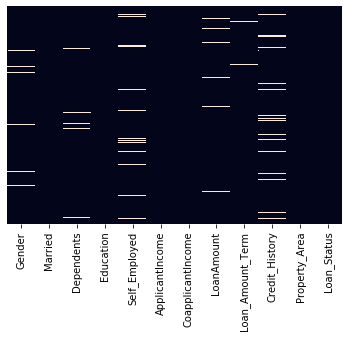

In [18]:
sns.heatmap(df_Train.isnull(),yticklabels=False,cbar=False)

In [19]:
df_Train['Gender']=df_Train['Gender'].fillna(df_Train['Gender'].mode()[0])
df_Train['Married']=df_Train['Married'].fillna(df_Train['Married'].mode()[0])
df_Train['Dependents']=df_Train['Dependents'].fillna(df_Train['Dependents'].mode()[0])
df_Train['Self_Employed']=df_Train['Self_Employed'].fillna(df_Train['Self_Employed'].mode()[0])
df_Train['LoanAmount']=df_Train['LoanAmount'].fillna(df_Train['LoanAmount'].mean())
df_Train['Loan_Amount_Term']=df_Train['Loan_Amount_Term'].fillna(df_Train['Loan_Amount_Term'].mean())
df_Train['Credit_History']=df_Train['Credit_History'].fillna(df_Train['Credit_History'].mean())

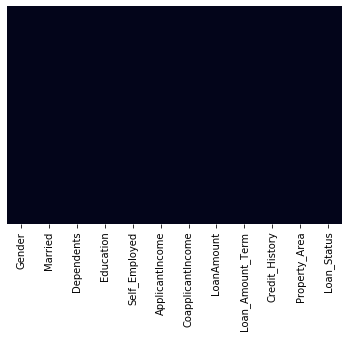

In [20]:
sns.heatmap(df_Train.isnull(),yticklabels=False,cbar=False)

In [21]:
df_Train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

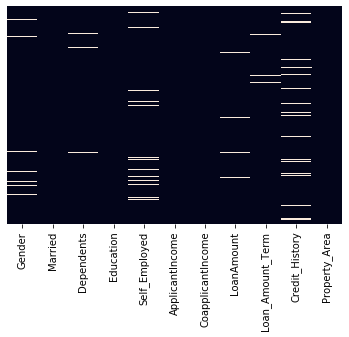

In [22]:
sns.heatmap(df_Test.isnull(),yticklabels=False,cbar=False)

In [23]:
df_Test['Gender']=df_Test['Gender'].fillna(df_Test['Gender'].mode()[0])
df_Test['Dependents']=df_Test['Dependents'].fillna(df_Test['Dependents'].mode()[0])
df_Test['Self_Employed']=df_Test['Self_Employed'].fillna(df_Test['Self_Employed'].mode()[0])
df_Test['LoanAmount']=df_Test['LoanAmount'].fillna(df_Test['LoanAmount'].mean())
df_Test['Loan_Amount_Term']=df_Test['Loan_Amount_Term'].fillna(df_Test['Loan_Amount_Term'].mean())
df_Test['Credit_History']=df_Test['Credit_History'].fillna(df_Test['Credit_History'].mean())

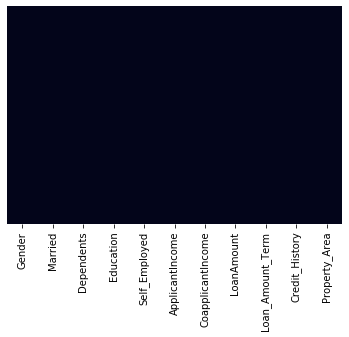

In [24]:
sns.heatmap(df_Test.isnull(),yticklabels=False,cbar=False)

In [25]:
df_Test['Gender'] = df_Test['Gender'].astype(int) 
df_Test['Married'] = df_Test['Married'].astype(int)
df_Test['Dependents'] = df_Test['Dependents'].astype(int) 
df_Test['Education'] = df_Test['Education'].astype(int)
df_Test['Self_Employed'] = df_Test['Self_Employed'].astype(int)
df_Test['Property_Area'] = df_Test['Property_Area'].astype(int) 
df_Test['Education'] = df_Test['Education'].astype(int)

In [26]:
df_Train['Gender'] = df_Train['Gender'].astype(int) 
df_Train['Married'] = df_Train['Married'].astype(int)
df_Train['Dependents'] = df_Train['Dependents'].astype(int) 
df_Train['Education'] = df_Train['Education'].astype(int)
df_Train['Self_Employed'] = df_Train['Self_Employed'].astype(int)
df_Train['Property_Area'] = df_Train['Property_Area'].astype(int) 
df_Train['Education'] = df_Train['Education'].astype(int)
df_Train['Loan_Status'] = df_Train['Loan_Status'].astype(int)

In [27]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [28]:
df_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int32  
 1   Married            367 non-null    int32  
 2   Dependents         367 non-null    int32  
 3   Education          367 non-null    int32  
 4   Self_Employed      367 non-null    int32  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int32  
dtypes: float64(3), int32(6), int64(2)
memory usage: 23.1 KB


In [29]:
print(df_Train.shape)
print(df_Test.shape)

(614, 12)
(367, 11)


In [30]:
df_Train.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,2,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.000000,360.0,1.0,1,1
6,1,1,0,2,0,2333,1516.0,95.000000,360.0,1.0,1,1
7,1,1,3,1,0,3036,2504.0,158.000000,360.0,0.0,3,0
8,1,1,2,1,0,4006,1526.0,168.000000,360.0,1.0,1,1
9,1,1,1,1,0,12841,10968.0,349.000000,360.0,1.0,3,0


In [31]:
X=df_Train.iloc[:,0:11]
y=df_Train['Loan_Status']

In [32]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1
3,1,1,0,2,0,2583,2358.0,120.000000,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1


In [33]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)

In [35]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(7,'Score'))  #print 8 best features

                Specs         Score
6   CoapplicantIncome  11342.041603
5     ApplicantIncome     93.904964
7          LoanAmount     39.211545
9      Credit_History     25.998867
8    Loan_Amount_Term      3.267315
10      Property_Area      2.253583
1             Married      1.782425


In [36]:
X1=df_Train[['CoapplicantIncome','ApplicantIncome','LoanAmount','Credit_History','Loan_Amount_Term',
            'Property_Area','Married']]
y1=df_Train[['Loan_Status']]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.20, random_state = 0)

In [38]:
X_train

,CoapplicantIncome,ApplicantIncome,LoanAmount,Credit_History,Loan_Amount_Term,Property_Area,Married
90,2900.0,2958,131.0,1.000000,360.0,3,1
533,0.0,11250,196.0,0.842199,360.0,3,0
452,1733.0,3948,149.0,0.000000,360.0,2,1
355,0.0,3813,116.0,1.000000,180.0,1,0
266,1387.0,4708,150.0,1.000000,360.0,3,1
...,...,...,...,...,...,...,...
277,1300.0,3103,80.0,1.000000,360.0,1,1
9,10968.0,12841,349.0,1.000000,360.0,3,1
359,3167.0,5167,200.0,1.000000,360.0,3,1
192,0.0,6033,160.0,1.000000,360.0,1,1


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
df_Test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,110.0,360.0,1.000000,1
1,1,1,1,1,0,3076,1500,126.0,360.0,1.000000,1
2,1,1,2,1,0,5000,1800,208.0,360.0,1.000000,1
3,1,1,2,1,0,2340,2546,100.0,360.0,0.825444,1
4,1,0,0,2,0,3276,0,78.0,360.0,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,2,1,4009,1777,113.0,360.0,1.000000,1
363,1,1,0,1,0,4158,709,115.0,360.0,1.000000,1
364,1,0,0,1,0,3250,1993,126.0,360.0,0.825444,3
365,1,1,0,1,0,5000,2393,158.0,360.0,1.000000,2


In [41]:
df_Test=df_Test[['CoapplicantIncome','ApplicantIncome','LoanAmount','Credit_History','Loan_Amount_Term',
                'Property_Area','Married']]
df_Test=scaler.fit_transform(df_Test)

In [42]:
test=pd.read_csv('test_lAUu6dG.csv')

In [56]:
import catboost
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=550,
                          learning_rate=0.38,
                          depth=1,
                          random_state=110,
                          loss_function='Logloss',
                          l2_leaf_reg=3,border_count=32,thread_count=225,verbose=1)
model.fit(X_train,y_train)

0:	learn: 0.5552047	total: 4.87ms	remaining: 2.67s
1:	learn: 0.5204549	total: 5.84ms	remaining: 1.6s
2:	learn: 0.5129220	total: 10.9ms	remaining: 1.99s
3:	learn: 0.4922691	total: 11.9ms	remaining: 1.63s
4:	learn: 0.4878646	total: 17.2ms	remaining: 1.88s
5:	learn: 0.4831691	total: 22.7ms	remaining: 2.06s
6:	learn: 0.4802349	total: 23.6ms	remaining: 1.83s
7:	learn: 0.4740681	total: 24.5ms	remaining: 1.66s
8:	learn: 0.4718210	total: 25.3ms	remaining: 1.52s
9:	learn: 0.4712657	total: 30.8ms	remaining: 1.66s
10:	learn: 0.4706344	total: 31.8ms	remaining: 1.56s
11:	learn: 0.4699111	total: 32.6ms	remaining: 1.46s
12:	learn: 0.4681938	total: 33.3ms	remaining: 1.38s
13:	learn: 0.4666233	total: 34.3ms	remaining: 1.31s
14:	learn: 0.4645523	total: 35.2ms	remaining: 1.25s
15:	learn: 0.4623427	total: 36.1ms	remaining: 1.21s
16:	learn: 0.4610929	total: 37ms	remaining: 1.16s
17:	learn: 0.4605046	total: 43.4ms	remaining: 1.28s
18:	learn: 0.4599154	total: 50ms	remaining: 1.4s
19:	learn: 0.4591194	total: 

In [57]:
pred=model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(pred,y_test))
print(confusion_matrix(pred,y_test))

0.8455284552845529
[[18  4]
 [15 86]]


In [58]:
pred=model.predict(df_Test)
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [59]:
test=pd.read_csv('test_lAUu6dG.csv')

pred=pd.DataFrame(pred)
pred

,0
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [60]:
sub_df=pd.read_csv('sample_submission_49d68Cx.csv')
datasets=pd.concat([sub_df['Loan_ID'],pred],axis=1)
datasets.columns=['Loan_ID','Loan_Status']
datasets.to_csv('loan_submission.csv',index=False)